In [2]:
import pandas as pd
import json
import urllib.request
from decouple import config, AutoConfig
from pymatgen.ext.matproj import MPRester
# from mp_api.client import MPRester
import seaborn as sns;sns.set()
from glob import glob
import re
from tqdm import tqdm
from sklearn.manifold import TSNE
import numpy as np
import warnings;warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 

config = AutoConfig(search_path='./.env')
API_KEY = config("API_KEY")

mpr = MPRester(API_KEY)

In [3]:
mpr.supported_properties

('energy',
 'energy_per_atom',
 'volume',
 'formation_energy_per_atom',
 'nsites',
 'unit_cell_formula',
 'pretty_formula',
 'is_hubbard',
 'elements',
 'nelements',
 'e_above_hull',
 'hubbards',
 'is_compatible',
 'spacegroup',
 'task_ids',
 'band_gap',
 'density',
 'icsd_id',
 'icsd_ids',
 'cif',
 'total_magnetization',
 'material_id',
 'oxide_type',
 'tags',
 'elasticity')

In [4]:
# data = mpr.query(criteria={
#     "elements": {
#         "$nin": ["He"]
#     },
#     "nelements": {"$gt": 3},
#     "formation_energy_per_atom" : {"$gt" : -3},
# },
#                  properties=["cif", "formation_energy_per_atom"])

In [5]:
# df = pd.DataFrame(data)
# df

In [6]:
# df = df.sample(frac=1).reset_index(drop=True).copy()
# df

In [7]:
# df.to_csv("dataset.csv", index=None)

In [8]:
# df["formation_energy_per_atom"].hist(bins=100)

In [9]:
# total = df.shape[0]
# train_val_size = int(total*0.8)
# test_size = total - train_val_size
# test_size

In [10]:
# for idx, cifdata in enumerate(df["cif"].values[:train_val_size]):
#     with open(f'data_dspbl2/train_val/{idx}.cif', "w") as f:
#         f.write(cifdata)

# for idx, cifdata in enumerate(df["cif"].values[train_val_size:]):
#     with open(f'data_dspbl2/test/{idx}.cif', "w") as f:
#         f.write(cifdata)

In [11]:
# df.iloc[:train_val_size, 1].reset_index(drop=True).to_csv("data_dspbl2/train_val/id_prop.csv", header=None)
# df.iloc[train_val_size:, 1].reset_index(drop=True).to_csv("data_dspbl2/test/id_prop.csv", header=None)

### test result

In [12]:
# pd.read_csv("test_results.csv", header=None)

In [13]:
df_test_result = pd.read_csv("test_results.csv", header=None)
df_test_result[3] = df_test_result[3].apply(lambda x : eval(x))
df_test_result[4] = df_test_result[4].apply(lambda x : eval(x))

df_test_result

,0,1,2,3,4
0,1737,-2.667515,-2.620155,"[1.2193297147750854, 2.693300724029541, 1.7000...","[0.11538594216108322, 0.08009197562932968, 0.0..."
1,1304,-2.274900,-2.163044,"[2.606306314468384, 1.0474798679351807, 3.9383...","[0.1288820207118988, 0.13221588730812073, 0.09..."
2,7932,-1.476486,-1.468954,"[3.3026316165924072, 1.5703725814819336, 1.768...","[0.08591464161872864, 0.13109387457370758, 0.1..."
3,3358,-2.344835,-2.311594,"[1.0157378911972046, 1.789806604385376, 0.8469...","[0.12997828423976898, 0.11424549669027328, 0.0..."
4,8206,-1.986026,-2.299412,"[1.555112600326538, 1.6692862510681152, 1.5516...","[0.12887650728225708, 0.11881978809833527, 0.0..."
...,...,...,...,...,...
8557,1191,-2.255559,-2.198436,"[1.2598854303359985, 1.7723640203475952, 3.138...","[0.09209410846233368, 0.08621825277805328, 0.1..."
8558,1474,-1.969618,-1.938648,"[2.18125581741333, 0.4994644522666931, 1.91601...","[0.13932515680789948, 0.053439732640981674, 0...."
8559,8386,-0.198866,-0.110595,"[1.5931978225708008, 0.4763354957103729, 0.768...","[0.05351090803742409, 0.03039582632482052, 0.0..."
8560,7944,-2.194744,-2.193440,"[0.9293055534362793, 1.3859279155731201, 1.315...","[0.11687259376049042, 0.08112659305334091, 0.0..."


In [15]:
from sklearn.metrics import mean_absolute_error as MAE

MAE(df_test_result[1], df_test_result[2])

0.05432528672035335

In [13]:
dfs = []
dfs_final = []
for i in range(df_test_result.shape[0]):
    dfs.append(pd.DataFrame(df_test_result[3][i]).T)
    dfs_final.append(pd.DataFrame(df_test_result[4][i]).T)

In [14]:
df_latent = pd.concat(dfs).reset_index(drop=True)
df_latent_final = pd.concat(dfs_final).reset_index(drop=True)

In [37]:
# perplex_list = np.arange(5, 101, 5)
# kld_list = []

# for perplexity in perplex_list:
#     tsne = TSNE(perplexity=perplexity, n_components=2, n_iter=1000)
#     tsne.fit_transform(df_latent_final)
#     kld_list.append(tsne.kl_divergence_)

# kld_list

[1.3708651065826416,
 1.2737038135528564,
 1.2294524908065796,
 1.2100861072540283,
 1.1992270946502686,
 1.1721892356872559,
 1.1498022079467773,
 1.1311235427856445,
 1.1065586805343628,
 1.087665319442749,
 1.072118878364563,
 1.064394474029541,
 1.0601577758789062,
 1.0373073816299438,
 1.0374999046325684,
 1.0261805057525635,
 1.0184253454208374,
 1.0060449838638306,
 1.0027856826782227,
 0.9885596036911011]

Text(0.5, 1.0, 'Prediction for test data')

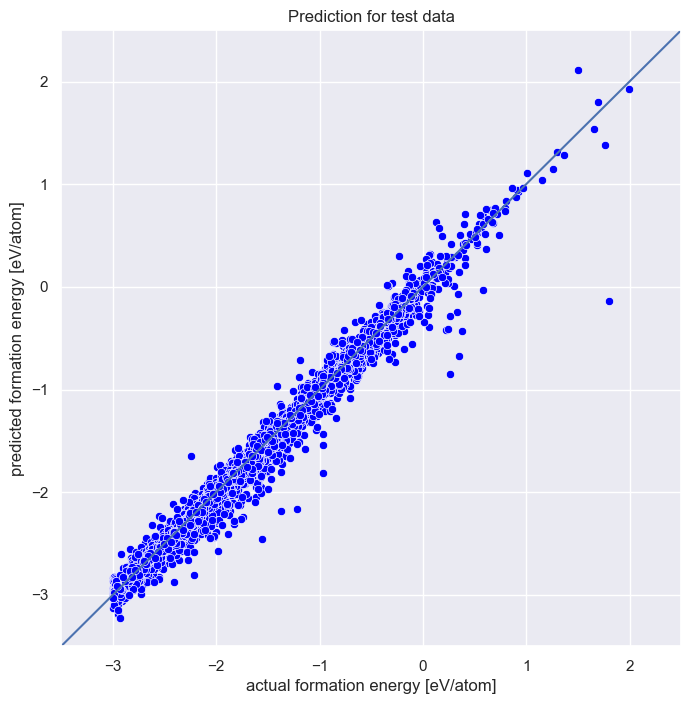

In [25]:
fig = plt.figure(figsize=(8, 8), dpi=100)
# ax = fig.add_subplot(111, aspect=2)
# ax.set_box_aspect(1)
sns.scatterplot(df_test_result[1], df_test_result[2], color="blue")
# sns.scatterplot(df_test_result[1], df_test_result[2], c=df_test_result[1])
plt.plot([-3.5, 2.5], [-3.5, 2.5])
plt.xlim([-3.5, 2.5]);plt.ylim([-3.5, 2.5])
plt.xlabel("actual formation energy per atom [eV/atom]")
plt.ylabel("predicted formation energy per atom [eV/atom]")
plt.title("Prediction for test data")

In [42]:
# tsne = TSNE(perplexity=50, n_components=2, n_iter=1000, random_state=42, method='exact')
tsne = TSNE(perplexity=100, n_components=2, random_state=42, n_iter=300, method="exact")

df_tsne = pd.DataFrame(tsne.fit_transform(df_latent_final))
tsne.kl_divergence_

1.6662936572265032

Text(0.5, 1.0, 'Latent space Visualization for test data')

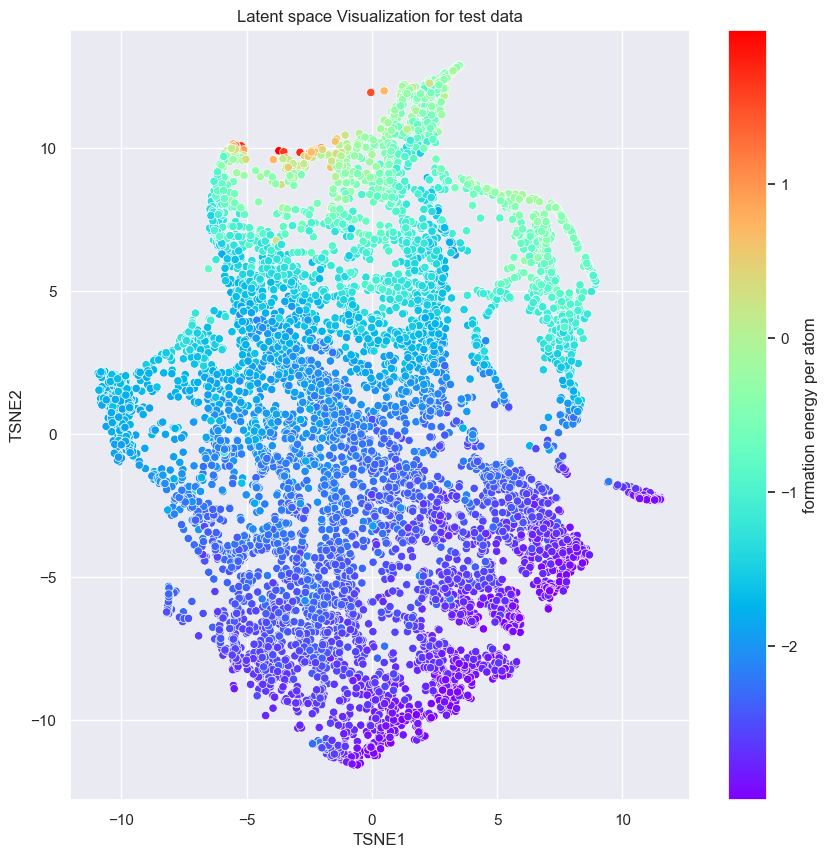

In [44]:
plt.figure(figsize=(10, 10), dpi=100)
sns.scatterplot(df_tsne[0], df_tsne[1], c=df_test_result[1])
points = plt.scatter(df_tsne[0], df_tsne[1], c=df_test_result[1], s=10, cmap="rainbow")  #set style options
plt.cla()
sns.scatterplot(df_tsne[0], df_tsne[1], hue=df_test_result[1], palette="rainbow")
plt.colorbar(points, label="formation energy per atom")
plt.legend().remove()
plt.xlabel("TSNE1");plt.ylabel("TSNE2")
plt.title("Latent space Visualization for test data")